In [ ]:
%pip install opendatasets
import opendatasets as od
import pandas
 
od.download("https://www.kaggle.com/datasets/arpan2022/carcolourdataset")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: arpan2022
Your Kaggle Key: ··········


100%|██████████| 574M/574M [00:03<00:00, 200MB/s]


### STEP 1-
This code imports required packages, libraries, and modules for the script:

- `os` is used to interact with the underlying operating system.
- `math` is used to perform mathematical operations.
- `numpy` is a numerical computing library.
- `matplotlib` is used for plotting.
- `tensorflow` is an open-source machine learning library.
- `tensorflow_hub` is a library to reuse pre-trained models.
- `Sequential` is a class from `tensorflow.keras.models` used to create a sequential model.
- `SGD` is the Stochastic Gradient Descent optimizer from `tensorflow.keras.optimizers`.




In [ ]:
import os
import math
import numpy as np
import sys
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_hub as hub
import cv2
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.preprocessing import label_binarize
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator

### STEP 2-
This code sets the path of the directories containing the training, validation, and test datasets.



In [ ]:
testing_dataset = '/content/carcolourdataset/test'
train_dataset = '/content/carcolourdataset/train'
validation_dataset = '/content/carcolourdataset/val'


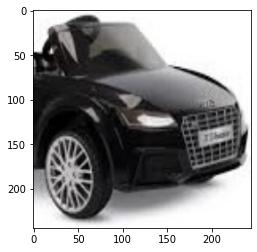

In [ ]:
img_height = 244
img_weight = 244
img_path = "/content/carcolourdataset/train/black/00a3225ef6.jpg"
img = cv2.imread(img_path)
new_array = cv2.resize(img, (img_weight, img_height))
plt.imshow(new_array, cmap='gray')
plt.show()


### STEP 2-
This code creates three instances of the ImageDataGenerator class:
- `traingen`
- `valgen`
- `testgen`

with the `rescale` argument set to `1/255`, to scale the pixel values from `0-255` to `0-1`.


In [ ]:
train_IDG = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/244.0)
validation_IDG = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/244.0)
test_IDG = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1.0/244.0)

### Step 3-
This code uses the `flow_from_directory` method of the `ImageDataGenerator` instances to load the training, validation, and test datasets and iterate over them. The `target_size` argument is set to 244x244, and the `batch_size` argument is set to 64.



In [ ]:
# load and iterate test dataset
test_dataset_processed = train_IDG.flow_from_directory(testing_dataset, class_mode='categorical', target_size=(img_weight, img_height), batch_size=64)
# load and iterate training dataset
train_dataset_processed = validation_IDG.flow_from_directory(train_dataset, class_mode='categorical', target_size=(img_weight, img_height),batch_size=64)
# load and iterate validation dataset
validation_dataset_processed = validation_IDG.flow_from_directory(validation_dataset, class_mode='categorical',target_size=(img_weight, img_height), batch_size=64)

Found 1556 images belonging to 15 classes.
Found 7267 images belonging to 15 classes.
Found 1550 images belonging to 15 classes.


In [ ]:
labels = list(test_dataset_processed.class_indices.keys())
labels

['beige',
 'black',
 'blue',
 'brown',
 'gold',
 'green',
 'grey',
 'orange',
 'pink',
 'purple',
 'red',
 'silver',
 'tan',
 'white',
 'yellow']

### Step 4-
The function `define_model` creates a Convolutional Neural Network (CNN) model using the Keras library.

The model is created as a Sequential model, which allows stacking of layers in order, one after the other.
- The first layer is a `Conv2D` layer with 32 filters, each of size `(3, 3)` and a `ReLU` activation function, with padding set to `'same'` and an input shape of `(244, 244, 3)`.
- This layer is followed by a `MaxPooling2D` layer with a pool size of `(2, 2)`.
- The `Dropout` layer with rate 0.2 helps to prevent overfitting.
- The next two `Conv2D` and `MaxPooling2D` layers are similar to the first one but with 64 and 128 filters, respectively.
- The `Flatten` layer flattens the 3D feature maps of the last `Conv2D` layer into a 1D vector.
- The next two `Dense` layers with 128 and 15 neurons, respectively, and `ReLU` and `softmax` activation functions, respectively, add capacity to the model for prediction.
- The `Dropout` layer with rate 0.5 follows the dense layer.
- The model is then compiled using the Stochastic Gradient Descent (SGD) optimizer with a learning rate of 0.001 and momentum of 0.9, the loss function is set to `'categorical_crossentropy'` and the metrics is set to `'accuracy'`.
- The function returns the compiled model.


In [ ]:
def define_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(244, 244, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D((2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(15, activation='softmax'))
    # compile model
    opt = SGD(lr=0.001, momentum=0.9)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
    return model

### Step 5-
The code creates a Convolutional Neural Network (CNN) model using the Keras library.

The model is created by calling the `define_model()` function, which returns the model object. The model object is then trained using the `fit` function.

The `train_dataset_processed` and `validation_dataset_processed` objects are iterators over the training and validation datasets, respectively, with the `steps_per_epoch` and `validation_steps` arguments specifying the number of steps to run before declaring one epoch to be finished. The model is trained over 10 epochs with progress information displayed by setting the `verbose` argument to 1.

The `history` object is a record of the model's training process, which includes the model's accuracy and loss on the training and validation datasets after each epoch.


In [ ]:
model = define_model()
model_matrics_data = model.fit(train_dataset_processed, steps_per_epoch=len(train_dataset_processed),validation_data=validation_dataset_processed, validation_steps=len(validation_dataset_processed), epochs=50, verbose=1)

Epoch 1/50
114/114 [==============================] - 62s 444ms/step - loss: 2.2036 - accuracy: 0.2443 - val_loss: 1.4972 - val_accuracy: 0.5077
Epoch 2/50
114/114 [==============================] - 50s 440ms/step - loss: 1.5220 - accuracy: 0.4664 - val_loss: 1.2462 - val_accuracy: 0.5987
Epoch 3/50
114/114 [==============================] - 49s 430ms/step - loss: 1.2362 - accuracy: 0.5647 - val_loss: 0.9208 - val_accuracy: 0.7142
Epoch 4/50
114/114 [==============================] - 49s 428ms/step - loss: 1.1435 - accuracy: 0.5954 - val_loss: 0.8886 - val_accuracy: 0.7026
Epoch 5/50
114/114 [==============================] - 49s 431ms/step - loss: 1.0629 - accuracy: 0.6312 - val_loss: 0.8200 - val_accuracy: 0.6916
Epoch 6/50
114/114 [==============================] - 49s 430ms/step - loss: 0.9509 - accuracy: 0.6642 - val_loss: 0.7513 - val_accuracy: 0.7523
Epoch 7/50
114/114 [==============================] - 49s 429ms/step - loss: 0.9097 - accuracy: 0.6806 - val_loss: 0.7160 - val_ac

### Step 7-
The code `model.save("model.h5")` saves the trained model to a file named `model.h5`.

The `save` method is a member function of the `tf.keras.Model` class and it's used to save a trained model to disk. The method takes a single argument, which is the file path (including the file name and extension) where you want to save the model. In this case, the file path is `"model.h5"`.

The model is saved in a format known as the HDF5 format, which is a hierarchical file format that supports large datasets and complex object structures. The `.h5` extension is a convention for HDF5 files that contain Keras models.

Once the model is saved, you can later load it using the `tf.keras.models.load_model` function. This makes it possible to use the saved model for making predictions on new data, fine-tuning it with additional data, or just inspecting its architecture and parameters.


In [ ]:
model.save("modelEpoch50.h5")

In [ ]:
# Generate predictions on the test set
y_pred = model.predict(test_dataset_processed)
y_pred = np.argmax(y_pred, axis=1)
y_true = test_dataset_processed.classes

### Step 8-
The code is a function that visualizes the training and validation performance of a model over multiple epochs. It uses the matplotlib library to create a 2x2 subplot figure and plots 4 metrics for the model: Cross Entropy Loss, Classification Accuracy, True Positive Rate and True Negative Rate.

The function takes a single argument `history`, which is an object that contains the training and validation loss and accuracy metrics for each epoch. It plots these values over the epochs and shows how they change over time.

The subplots are named and labeled appropriately, with the train data plotted in blue and the validation data plotted in orange. Legends are added to each subplot to indicate the meaning of each line.

Finally, the `plt.tight_layout()` function is used to ensure that the subplots are displayed neatly, and `plt.show()` is used to display the figure on the screen.


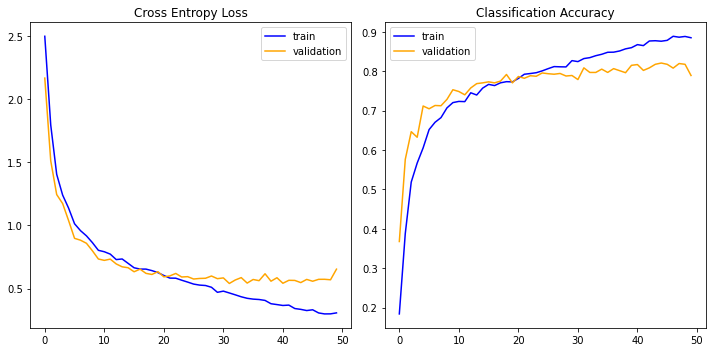

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

ax[0].set_title('Cross Entropy Loss')
ax[0].plot(model_matrics_data.history['loss'], color='blue', label='train')
ax[0].plot(model_matrics_data.history['val_loss'], color='orange', label='validation')
ax[0].legend(loc='upper right')

ax[1].set_title('Classification Accuracy')
ax[1].plot(model_matrics_data.history['accuracy'], color='blue', label='train')
ax[1].plot(model_matrics_data.history['val_accuracy'], color='orange', label='validation')
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.show()
plt.close()

### Step 9-
The code evaluates the performance of the CNN model on a test dataset.

The `model.evaluate` function is used to evaluate the performance of the model. The test dataset is passed to the function through the `test_dataset_processed` argument and the number of steps to be taken from the test dataset is set to the length of `test_dataset_processed` using the `steps` argument. The `verbose` argument is set to 0 to suppress the output during evaluation.

The evaluation results are stored in two variables `loss` and `acc`. `loss` is the value of the loss function and `acc` is the accuracy of the model on the test dataset. Finally, `acc` is printed, which gives the accuracy of the model on the test data.


In [ ]:
loss, acc = model.evaluate(test_dataset_processed, steps=len(test_dataset_processed), verbose=0)
# Print the results
print("Acc: ", acc)
print("Loss: ", loss)

Acc:  0.7924164533615112
Loss:  0.9762733578681946


### Step 10-
This code evaluates the performance of a machine learning model. The model has been trained and is used to make predictions on the test data (test_dataset_processed). The prediction results are stored in the "y_pred" variable.

The "np.argmax" function is used to convert the predicted probability distribution over all the classes into the most likely class label. The argument "axis=1" means that the maximum value is found along each row of the array, which corresponds to each sample in the test data.

The true class labels of the test data are stored in the "y_true" variable, which is obtained from the "test_dataset_processed.classes" attribute.

The code then calculates several performance metrics: accuracy, F1-Score, precision, and recall. These metrics are calculated using the "accuracy_score", "f1_score", "precision_score", and "recall_score" functions from scikit-learn library, respectively. The argument "average='weighted'" computes the average score weighted by the number of samples in each class.

Finally, the results of the performance metrics are printed to the console.


In [ ]:
# Calculate accuracy
acc = accuracy_score(y_true, y_pred)

# Calculate F1-Score
f1 = f1_score(y_true, y_pred, average='weighted')

# Calculate Precision
precision = precision_score(y_true, y_pred, average='weighted')

# Calculate Recall
recall = recall_score(y_true, y_pred, average='weighted')


# Print the results
print("Accuracy: ", acc)
print("F1-Score: ", f1)
print("Precision: ", precision)
print("Recall: ", recall)

25/25 [==============================] - 7s 280ms/step
Accuracy:  0.07519280205655526
F1-Score:  0.07529874124698402
Precision:  0.07609137995235406
Recall:  0.07519280205655526


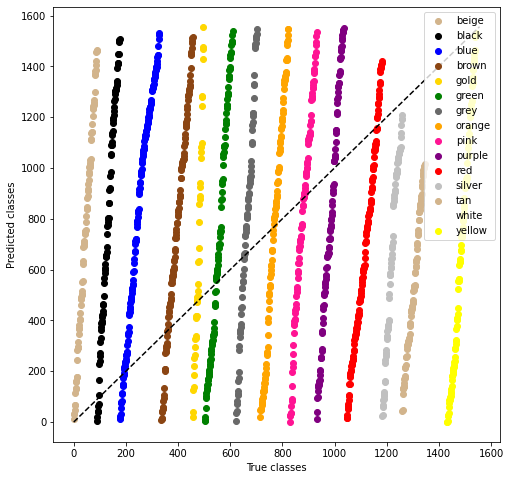

In [ ]:
# Define class labels and colors
class_labels = ['beige', 'black', 'blue', 'brown', 'gold', 'green', 'grey', 'orange', 'pink', 'purple', 'red', 'silver', 'tan', 'white', 'yellow']
class_colors = ['tan', 'black', 'blue', 'saddlebrown', 'gold', 'green', 'dimgray', 'orange', 'deeppink', 'purple', 'red', 'silver', 'tan', 'white', 'yellow']

# Create scatter plot
fig, ax = plt.subplots(figsize=(8, 8))
for i, label in enumerate(class_labels):
    x = np.where(y_true == i)[0]
    y = np.where(y_pred == i)[0]
    min_size = min(len(x), len(y))
    ax.scatter(x[:min_size], y[:min_size], color=class_colors[i], label=label)
ax.legend()
ax.plot([0, len(y_true)], [0, len(y_true)], 'k--')
ax.set_xlabel('True classes')
ax.set_ylabel('Predicted classes')
plt.show()

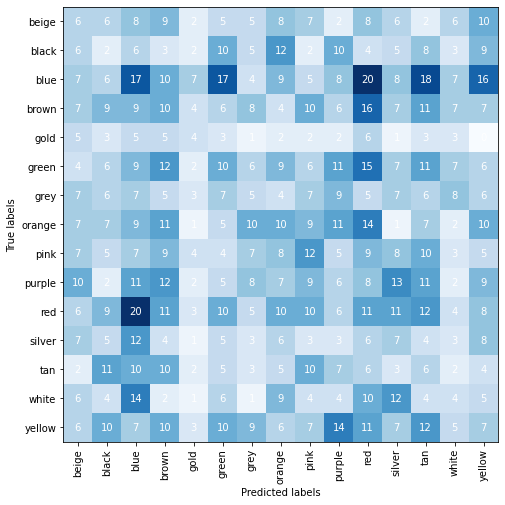

In [ ]:
# Create a confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Define class labels (replace with your own if needed)
class_labels = np.unique(y_true)

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')
ax.grid(False)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_xticks(range(len(labels)))
ax.set_xticklabels(labels, rotation=90)
ax.set_yticks(range(len(labels)))
ax.set_yticklabels(labels)
ax.set_ylim(len(labels)-0.5, -0.5)
for i in range(len(labels)):
    for j in range(len(labels)):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.show()